In [3]:
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [107]:
N = 300
D = 30
M = 10
K = 1


X = torch.FloatTensor(torch.randn(N,D))
y = torch.FloatTensor(torch.randn(N,1))



W1 = Variable(torch.randn(D,M), requires_grad = True)
W2 = Variable(torch.randn(M,K), requires_grad = True)

b1 = Variable(torch.randn(M), requires_grad=True)
b2 = Variable(torch.randn(K), requires_grad=True)


In [108]:
def MSE(y, y_pred):
    
    return (y - y_pred).pow(2).mean()

In [109]:
learning_rate = 1e-5
losses = []
for i in range(3000):

        xW1 = torch.matmul(X,W1)
        zh = torch.relu(xW1 + b1)

        pred = torch.matmul(zh,W2) + b2
        erro = MSE(y,pred)
        
        if i % 200 == 0:
            print(f'Epoch {i} : {erro.data}')
        
        
        losses.append(erro.data)
        erro.backward()
    
        gradW1 = W1.grad.data
        gradW2 = W2.grad.data
        gradb1 = b1.grad.data
        gradb2 = b2.grad.data


        W1.data = W1.data - learning_rate* gradW1
        W2.data = W2.data - learning_rate*gradW2

        b1.data = b1.data - learning_rate*gradb1
        b2.data = b2.data - learning_rate *gradb2
        
        W1.grad.data.zero_()

Epoch 0 : 67.35713195800781
Epoch 200 : 38.293216705322266
Epoch 400 : 21.879365921020508
Epoch 600 : 21.387956619262695
Epoch 800 : 29.284473419189453
Epoch 1000 : 7.486393451690674
Epoch 1200 : 13.859436988830566
Epoch 1400 : 11.1597318649292
Epoch 1600 : 7.460078239440918
Epoch 1800 : 4.255046844482422
Epoch 2000 : 1.8318477869033813
Epoch 2200 : 2.745121955871582
Epoch 2400 : 2.2276926040649414
Epoch 2600 : 1.2430903911590576
Epoch 2800 : 1.6045076847076416


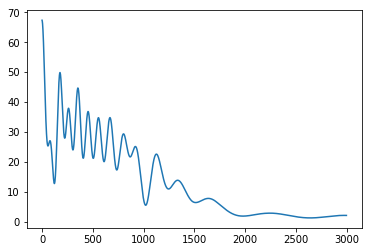

In [110]:
plt.plot(losses)